<a href="https://colab.research.google.com/github/shreyus3003/GenAI/blob/main/GLFNet/GLFNet_Diaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fractional order = 1**





In [ ]:
pip install tabulate

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.6939 - val_loss: 0.6790
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.6738 - val_loss: 0.6581
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.6513 - val_loss: 0.6328
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.6244 - val_loss: 0.6012
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.5910 - val_loss: 0.5621
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.5498 - val_loss: 0.5159
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.5018 - val_loss: 0.4637
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.4488 - val_loss: 0.4080
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.3927 - val_loss: 0.3515
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.3367 - val_loss: 0.2976
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.2848 - val_loss: 0.2496
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.2396 - val_loss: 0.2096


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
F1 Score for CNN: 0.8247422680412371
F1 Score for GLF net: 0.4905660377358491


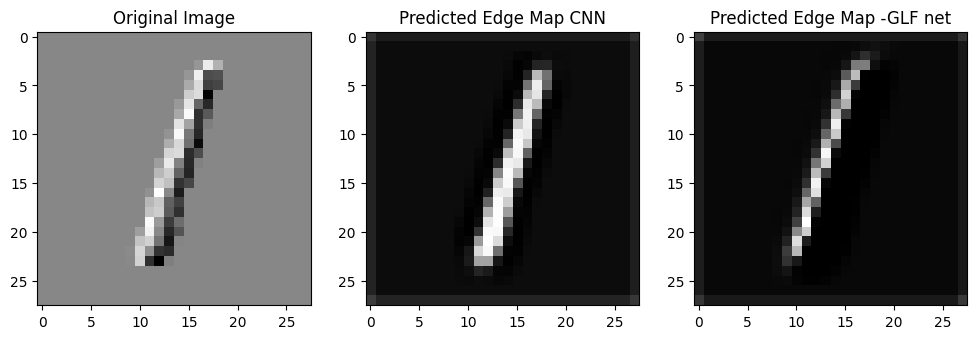

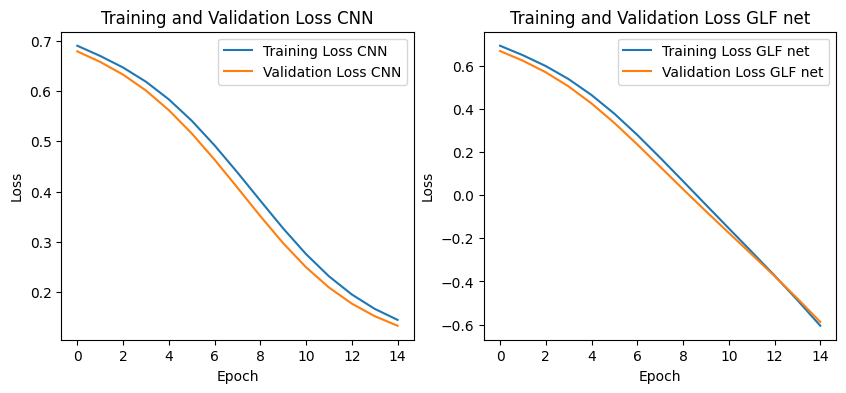

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.1307 - val_loss: 0.1191
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1178 - val_loss: 0.1084
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.1082 - val_loss: 0.1003
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.1006 - val_loss: 0.0941
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0951 - val_loss: 0.0893
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0907 - val_loss: 0.0856
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0873 - val_loss: 0.0826
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0846 - val_loss: 0.0802
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0819 - val_loss: 0.0782
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 0.0798 - val_loss: 0.0766
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - loss: 0.0791 - val_loss: 0.0752
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0775 - val_lo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Input
from tensorflow.keras.optimizers import Adam
from tabulate import tabulate  # Import tabulate for table formatting
from PIL import Image
import time # Import the time module

# Load the data (replace this with your own dataset loading code)
# For this example, let's load the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

#---------------------------------diaa-----------------------------------------------#

# Define the fractional Grünwald-Letnikov derivative function with support for fractional orders
def fractional_grunwald_letnikov(images, order, step_size):
    diff_images = np.zeros_like(images)
    max_rows, max_cols = images.shape[1], images.shape[2]
    for i in range(images.shape[0]):
        # Compute fractional derivative along rows
        diff_rows = np.diff(images[i], n=int(order), axis=0) / np.power(step_size, order)
        # Pad the output array to match the shape of the original array
        diff_rows_padded = np.pad(diff_rows, ((0, max_rows - diff_rows.shape[0]), (0, 0), (0, 0)), mode='constant')
        # Compute fractional derivative along columns
        diff_cols = np.diff(images[i], n=int(order), axis=1) / np.power(step_size, order)
        # Pad the output array to match the shape of the original array
        diff_cols_padded = np.pad(diff_cols, ((0, 0), (0, max_cols - diff_cols.shape[1]), (0, 0)), mode='constant')
        # Combine horizontal and vertical differences
        diff_images[i] = diff_rows_padded + diff_cols_padded
    return diff_images

# Fractional neighboring pixels vertically
train_images_diff = fractional_grunwald_letnikov(train_images, order=1, step_size=1)
test_images_diff = fractional_grunwald_letnikov(test_images, order=1, step_size=1)

#---------------------------------diaa-----------------------------------------------#

# Define the CNN architecture for image edge detection (Simple CNN)
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the simple CNN model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the simple CNN model
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
# Test the custom subtraction method model on the test dataset

# Test the custom subtraction method model on a sample image

test_image= test_images[2]
test_image= np.expand_dims(test_image, axis=0)  # Add batch dimension
predicted_edge_maps_simple = simple_model.predict(test_image)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_simple_binary = (predicted_edge_maps_simple > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#


# Define the CNN architecture for image edge detection (Fractional method)
custom_model = Sequential([
    Input(shape=(28, 28, 1)),  # Input shape is (28, 28, 1) for MNIST images
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the custom subtraction method model
custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the custom subtraction method model
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))

# Test the custom subtraction method model on a sample image
test_image_diff = test_images_diff[2]
test_image_diff = np.expand_dims(test_image_diff, axis=0)  # Add batch dimension
predicted_edge_maps_custom = custom_model.predict(test_image_diff)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_custom_binary = (predicted_edge_maps_custom > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#

# Calculate F1 scores

# Create binary edge maps for the test images (simple thresholding)

test_images_maps = (test_image> 0.1).astype(int)
f1_simple = f1_score(test_images_maps.reshape(-1), predicted_edge_maps_simple_binary.reshape(-1))

test_images_diff_maps = (test_image_diff > 0.1).astype(int)
f1_custom = f1_score(test_images_diff_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

# Print F1 scores
print("F1 Score for CNN:", f1_simple)
print("F1 Score for GLF net:", f1_custom)

# Create a table of Loss and F1 scores
table = [
    ['Model', 'Loss', 'F1 Score'],
    ['CNN', np.round(history_simple.history['loss'][-1], 4), np.round(f1_simple, 4)],
    ['GLF net', np.round(history_custom.history['loss'][-1], 4), np.round(f1_custom, 4)]
]

# Plot results for simple CNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(test_image_diff), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(predicted_edge_maps_simple), cmap='gray')
plt.title('Predicted Edge Map CNN')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predicted_edge_maps_custom ), cmap='gray')
plt.title('Predicted Edge Map -GLF net')

plt.show()

# Plot training and validation loss for both models
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss CNN')
plt.plot(history_simple.history['val_loss'], label='Validation Loss CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss CNN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Training Loss GLF net')
plt.plot(history_custom.history['val_loss'], label='Validation Loss GLF net')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GLF net')
plt.legend()

plt.show()

#---------------------------------------------------------------------------#
# Measure training time for simple CNN model
start_time_simple = time.time()
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
end_time_simple = time.time()
training_time_simple = end_time_simple - start_time_simple


# Measure inference time for simple CNN model
start_time_inference_simple = time.time()
predicted_edge_maps_simple = simple_model.predict(test_image)
end_time_inference_simple = time.time()
inference_time_simple = end_time_inference_simple - start_time_inference_simple

#---------------------------------------------------------------------------#

# Measure training time for custom CNN (GLF net) model
start_time_custom = time.time()
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))
end_time_custom = time.time()
training_time_custom = end_time_custom - start_time_custom



# Measure inference time for custom CNN (GLF net) model
start_time_inference_custom = time.time()
predicted_edge_maps_custom = custom_model.predict(test_image_diff)
end_time_inference_custom = time.time()
inference_time_custom = end_time_inference_custom - start_time_inference_custom
#-------------------------------------------------------------------------------#
# Create table
table = [
    ["Model", "Training Time (seconds)", "Inference Time (seconds)"],
    ["Simple CNN", f"{training_time_simple:.4f}", f"{inference_time_simple:.4f}"],
    ["GLF net", f"{training_time_custom:.4f}", f"{inference_time_custom:.4f}"]
]
# Print table using tabulate
print(tabulate(table, headers='firstrow'))


# **Fractional order = 0.95**

Epoch 1/15
8/8 [==============================] - 2s 130ms/step - loss: 0.6986 - val_loss: 0.6836
Epoch 2/15
8/8 [==============================] - 1s 112ms/step - loss: 0.6734 - val_loss: 0.6603
Epoch 3/15
8/8 [==============================] - 1s 113ms/step - loss: 0.6486 - val_loss: 0.6350
Epoch 4/15
8/8 [==============================] - 1s 117ms/step - loss: 0.6206 - val_loss: 0.6044
Epoch 5/15
8/8 [==============================] - 1s 111ms/step - loss: 0.5866 - val_loss: 0.5668
Epoch 6/15
8/8 [==============================] - 1s 109ms/step - loss: 0.5456 - val_loss: 0.5218
Epoch 7/15
8/8 [==============================] - 1s 116ms/step - loss: 0.4973 - val_loss: 0.4694
Epoch 8/15
8/8 [==============================] - 1s 168ms/step - loss: 0.4424 - val_loss: 0.4111
Epoch 9/15
8/8 [==============================] - 1s 170ms/step - loss: 0.3831 - val_loss: 0.3506
Epoch 10/15
8/8 [==============================] - 1s 150ms/step - loss: 0.3240 - val_loss: 0.2931
Epoch 11/15
8/8 [==

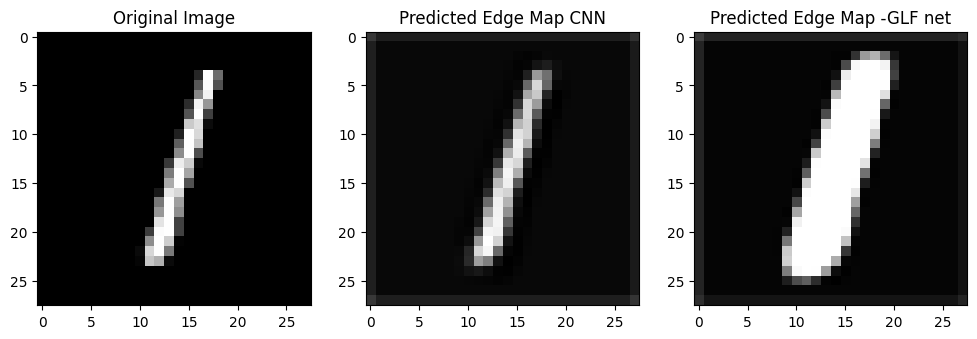

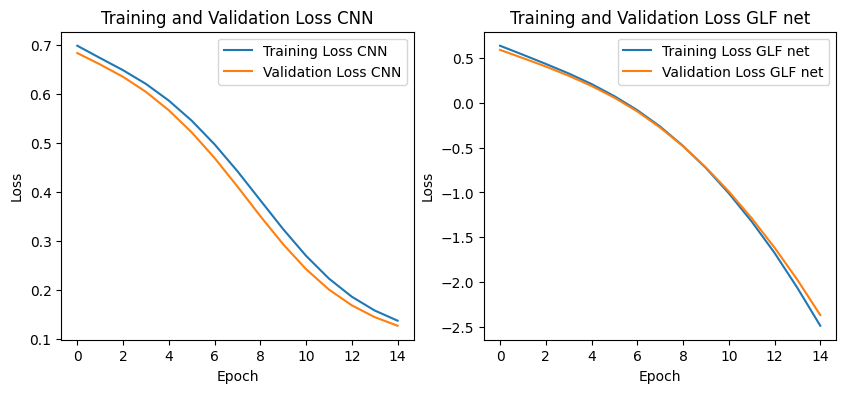

Epoch 1/15
8/8 [==============================] - 1s 118ms/step - loss: 0.1219 - val_loss: 0.1139
Epoch 2/15
8/8 [==============================] - 1s 119ms/step - loss: 0.1109 - val_loss: 0.1044
Epoch 3/15
8/8 [==============================] - 1s 162ms/step - loss: 0.1028 - val_loss: 0.0973
Epoch 4/15
8/8 [==============================] - 1s 167ms/step - loss: 0.0966 - val_loss: 0.0920
Epoch 5/15
8/8 [==============================] - 1s 174ms/step - loss: 0.0919 - val_loss: 0.0877
Epoch 6/15
8/8 [==============================] - 1s 122ms/step - loss: 0.0882 - val_loss: 0.0843
Epoch 7/15
8/8 [==============================] - 1s 111ms/step - loss: 0.0853 - val_loss: 0.0816
Epoch 8/15
8/8 [==============================] - 1s 113ms/step - loss: 0.0829 - val_loss: 0.0794
Epoch 9/15
8/8 [==============================] - 1s 110ms/step - loss: 0.0809 - val_loss: 0.0776
Epoch 10/15
8/8 [==============================] - 1s 111ms/step - loss: 0.0793 - val_loss: 0.0760
Epoch 11/15
8/8 [==

In [ ]:
# Fractional neighboring pixels vertically
train_images_diff = fractional_grunwald_letnikov(train_images, order=0.95, step_size=1)
test_images_diff = fractional_grunwald_letnikov(test_images, order=0.95, step_size=1)

#---------------------------------diaa-----------------------------------------------#

# Define the CNN architecture for image edge detection (Simple CNN)
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the simple CNN model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the simple CNN model
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
# Test the custom subtraction method model on the test dataset

# Test the custom subtraction method model on a sample image
test_image= test_images[2]
test_image= np.expand_dims(test_image, axis=0)  # Add batch dimension
predicted_edge_maps_simple = simple_model.predict(test_image)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_simple_binary = (predicted_edge_maps_simple > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#


# Define the CNN architecture for image edge detection (Fractional method)
custom_model = Sequential([
    Input(shape=(28, 28, 1)),  # Input shape is (28, 28, 1) for MNIST images
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the custom subtraction method model
custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the custom subtraction method model
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))

# Test the custom subtraction method model on a sample image
test_image_diff = test_images_diff[2]
test_image_diff = np.expand_dims(test_image_diff, axis=0)  # Add batch dimension
predicted_edge_maps_custom = custom_model.predict(test_image_diff)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_custom_binary = (predicted_edge_maps_custom > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#

# Calculate F1 scores

# Create binary edge maps for the test images (simple thresholding)

test_images_maps = (test_image> 0.1).astype(int)
f1_simple = f1_score(test_images_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

test_images_diff_maps = (test_image_diff > 0.1).astype(int)
f1_custom = f1_score(test_images_diff_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

# Print F1 scores
print("F1 Score for CNN:", f1_simple)
print("F1 Score for GLF net:", f1_custom)

# Create a table of Loss and F1 scores
table = [
    ['Model', 'Loss', 'F1 Score'],
    ['CNN', np.round(history_simple.history['loss'][-1], 4), np.round(f1_simple, 4)],
    ['GLF net', np.round(history_custom.history['loss'][-1], 4), np.round(f1_custom, 4)]
]



# Print table using tabulate
print(tabulate(table, headers='firstrow'))

# Plot results for simple CNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(test_image_diff), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(predicted_edge_maps_simple), cmap='gray')
plt.title('Predicted Edge Map CNN')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predicted_edge_maps_custom ), cmap='gray')
plt.title('Predicted Edge Map -GLF net')

plt.show()

# Plot training and validation loss for both models
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss CNN')
plt.plot(history_simple.history['val_loss'], label='Validation Loss CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss CNN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Training Loss GLF net')
plt.plot(history_custom.history['val_loss'], label='Validation Loss GLF net')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GLF net')
plt.legend()

plt.show()

#---------------------------------------------------------------------------#
# Measure training time for simple CNN model
start_time_simple = time.time()
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
end_time_simple = time.time()
training_time_simple = end_time_simple - start_time_simple


# Measure inference time for simple CNN model
start_time_inference_simple = time.time()
predicted_edge_maps_simple = simple_model.predict(test_image)
end_time_inference_simple = time.time()
inference_time_simple = end_time_inference_simple - start_time_inference_simple

#---------------------------------------------------------------------------#

# Measure training time for custom CNN (GLF net) model
start_time_custom = time.time()
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))
end_time_custom = time.time()
training_time_custom = end_time_custom - start_time_custom



# Measure inference time for custom CNN (GLF net) model
start_time_inference_custom = time.time()
predicted_edge_maps_custom = custom_model.predict(test_image_diff)
end_time_inference_custom = time.time()
inference_time_custom = end_time_inference_custom - start_time_inference_custom
#-------------------------------------------------------------------------------#
# Create table
table = [
    ["Model", "Training Time (seconds)", "Inference Time (seconds)"],
    ["Simple CNN", f"{training_time_simple:.4f}", f"{inference_time_simple:.4f}"],
    ["GLF net", f"{training_time_custom:.4f}", f"{inference_time_custom:.4f}"]
]
# Print table using tabulate
print(tabulate(table, headers='firstrow'))
#-------------------------------------------------------------------------------#



# **Fractional order = 0.97**

Epoch 1/15
8/8 [==============================] - 2s 199ms/step - loss: 0.6839 - val_loss: 0.6731
Epoch 2/15
8/8 [==============================] - 1s 178ms/step - loss: 0.6617 - val_loss: 0.6496
Epoch 3/15
8/8 [==============================] - 1s 114ms/step - loss: 0.6352 - val_loss: 0.6199
Epoch 4/15
8/8 [==============================] - 1s 108ms/step - loss: 0.6021 - val_loss: 0.5824
Epoch 5/15
8/8 [==============================] - 1s 114ms/step - loss: 0.5609 - val_loss: 0.5366
Epoch 6/15
8/8 [==============================] - 1s 123ms/step - loss: 0.5120 - val_loss: 0.4833
Epoch 7/15
8/8 [==============================] - 1s 120ms/step - loss: 0.4562 - val_loss: 0.4243
Epoch 8/15
8/8 [==============================] - 1s 115ms/step - loss: 0.3966 - val_loss: 0.3640
Epoch 9/15
8/8 [==============================] - 1s 126ms/step - loss: 0.3377 - val_loss: 0.3068
Epoch 10/15
8/8 [==============================] - 1s 130ms/step - loss: 0.2836 - val_loss: 0.2562
Epoch 11/15
8/8 [==

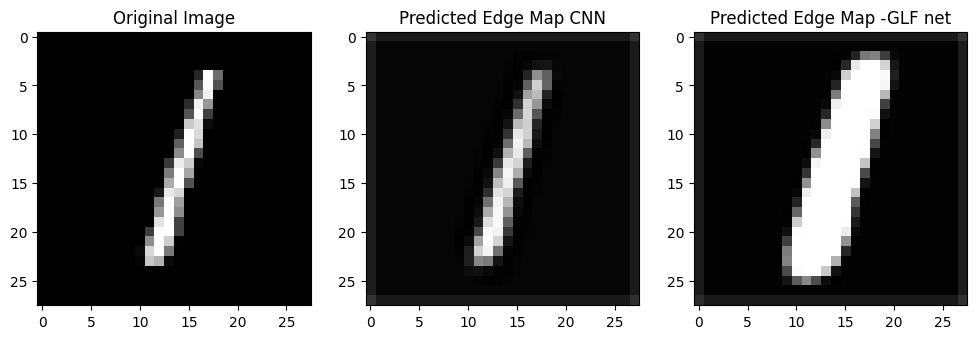

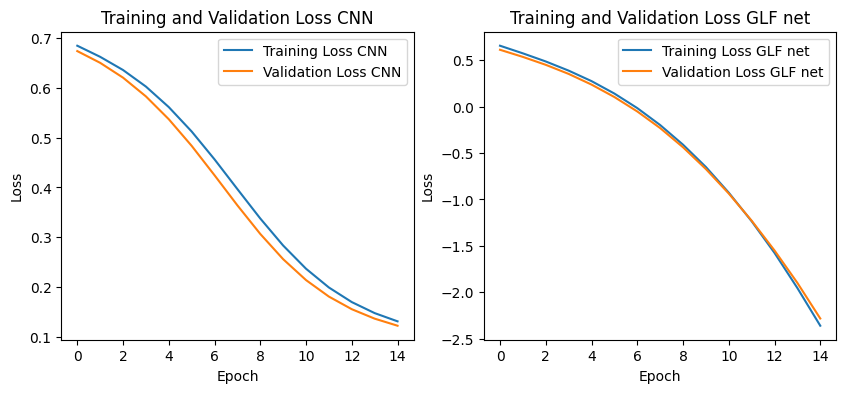

Epoch 1/15
8/8 [==============================] - 1s 138ms/step - loss: 0.1194 - val_loss: 0.1122
Epoch 2/15
8/8 [==============================] - 1s 165ms/step - loss: 0.1101 - val_loss: 0.1041
Epoch 3/15
8/8 [==============================] - 1s 166ms/step - loss: 0.1030 - val_loss: 0.0979
Epoch 4/15
8/8 [==============================] - 1s 176ms/step - loss: 0.0975 - val_loss: 0.0930
Epoch 5/15
8/8 [==============================] - 1s 142ms/step - loss: 0.0932 - val_loss: 0.0891
Epoch 6/15
8/8 [==============================] - 1s 126ms/step - loss: 0.0897 - val_loss: 0.0859
Epoch 7/15
8/8 [==============================] - 1s 127ms/step - loss: 0.0869 - val_loss: 0.0833
Epoch 8/15
8/8 [==============================] - 1s 114ms/step - loss: 0.0845 - val_loss: 0.0811
Epoch 9/15
8/8 [==============================] - 1s 123ms/step - loss: 0.0826 - val_loss: 0.0792
Epoch 10/15
8/8 [==============================] - 1s 112ms/step - loss: 0.0809 - val_loss: 0.0777
Epoch 11/15
8/8 [==

In [ ]:
# Fractional neighboring pixels vertically
train_images_diff = fractional_grunwald_letnikov(train_images, order=0.97, step_size=1)
test_images_diff = fractional_grunwald_letnikov(test_images, order=0.97, step_size=1)

#---------------------------------diaa-----------------------------------------------#

# Define the CNN architecture for image edge detection (Simple CNN)
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the simple CNN model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the simple CNN model
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
# Test the custom subtraction method model on the test dataset

# Test the custom subtraction method model on a sample image
test_image= test_images[2]
test_image= np.expand_dims(test_image, axis=0)  # Add batch dimension
predicted_edge_maps_simple = simple_model.predict(test_image)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_simple_binary = (predicted_edge_maps_simple > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#


# Define the CNN architecture for image edge detection (Fractional method)
custom_model = Sequential([
    Input(shape=(28, 28, 1)),  # Input shape is (28, 28, 1) for MNIST images
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the custom subtraction method model
custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the custom subtraction method model
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))

# Test the custom subtraction method model on a sample image
test_image_diff = test_images_diff[2]
test_image_diff = np.expand_dims(test_image_diff, axis=0)  # Add batch dimension
predicted_edge_maps_custom = custom_model.predict(test_image_diff)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_custom_binary = (predicted_edge_maps_custom > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#

# Calculate F1 scores

# Create binary edge maps for the test images (simple thresholding)

test_images_maps = (test_image> 0.1).astype(int)
f1_simple = f1_score(test_images_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

test_images_diff_maps = (test_image_diff > 0.1).astype(int)
f1_custom = f1_score(test_images_diff_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

# Print F1 scores
print("F1 Score for CNN:", f1_simple)
print("F1 Score for GLF net:", f1_custom)

# Create a table of Loss and F1 scores
table = [
    ['Model', 'Loss', 'F1 Score'],
    ['CNN', np.round(history_simple.history['loss'][-1], 4), np.round(f1_simple, 4)],
    ['GLF net', np.round(history_custom.history['loss'][-1], 4), np.round(f1_custom, 4)]
]


# Plot results for simple CNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(test_image_diff), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(predicted_edge_maps_simple), cmap='gray')
plt.title('Predicted Edge Map CNN')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predicted_edge_maps_custom ), cmap='gray')
plt.title('Predicted Edge Map -GLF net')

plt.show()

# Plot training and validation loss for both models
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss CNN')
plt.plot(history_simple.history['val_loss'], label='Validation Loss CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss CNN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Training Loss GLF net')
plt.plot(history_custom.history['val_loss'], label='Validation Loss GLF net')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GLF net')
plt.legend()

plt.show()

#---------------------------------------------------------------------------#
# Measure training time for simple CNN model
start_time_simple = time.time()
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
end_time_simple = time.time()
training_time_simple = end_time_simple - start_time_simple


# Measure inference time for simple CNN model
start_time_inference_simple = time.time()
predicted_edge_maps_simple = simple_model.predict(test_image)
end_time_inference_simple = time.time()
inference_time_simple = end_time_inference_simple - start_time_inference_simple

#---------------------------------------------------------------------------#

# Measure training time for custom CNN (GLF net) model
start_time_custom = time.time()
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))
end_time_custom = time.time()
training_time_custom = end_time_custom - start_time_custom



# Measure inference time for custom CNN (GLF net) model
start_time_inference_custom = time.time()
predicted_edge_maps_custom = custom_model.predict(test_image_diff)
end_time_inference_custom = time.time()
inference_time_custom = end_time_inference_custom - start_time_inference_custom
#-------------------------------------------------------------------------------#
# Create table
table = [
    ["Model", "Training Time (seconds)", "Inference Time (seconds)"],
    ["Simple CNN", f"{training_time_simple:.4f}", f"{inference_time_simple:.4f}"],
    ["GLF net", f"{training_time_custom:.4f}", f"{inference_time_custom:.4f}"]
]
# Print table using tabulate
print(tabulate(table, headers='firstrow'))
#-------------------------------------------------------------------------------#

# **Fractional oreder = 0.99**

Epoch 1/15
8/8 [==============================] - 2s 181ms/step - loss: 0.6888 - val_loss: 0.6780
Epoch 2/15
8/8 [==============================] - 1s 178ms/step - loss: 0.6687 - val_loss: 0.6557
Epoch 3/15
8/8 [==============================] - 2s 197ms/step - loss: 0.6434 - val_loss: 0.6266
Epoch 4/15
8/8 [==============================] - 1s 138ms/step - loss: 0.6109 - val_loss: 0.5895
Epoch 5/15
8/8 [==============================] - 1s 126ms/step - loss: 0.5699 - val_loss: 0.5433
Epoch 6/15
8/8 [==============================] - 1s 125ms/step - loss: 0.5202 - val_loss: 0.4893
Epoch 7/15
8/8 [==============================] - 1s 130ms/step - loss: 0.4638 - val_loss: 0.4302
Epoch 8/15
8/8 [==============================] - 1s 125ms/step - loss: 0.4039 - val_loss: 0.3699
Epoch 9/15
8/8 [==============================] - 1s 123ms/step - loss: 0.3447 - val_loss: 0.3126
Epoch 10/15
8/8 [==============================] - 1s 127ms/step - loss: 0.2903 - val_loss: 0.2618
Epoch 11/15
8/8 [==

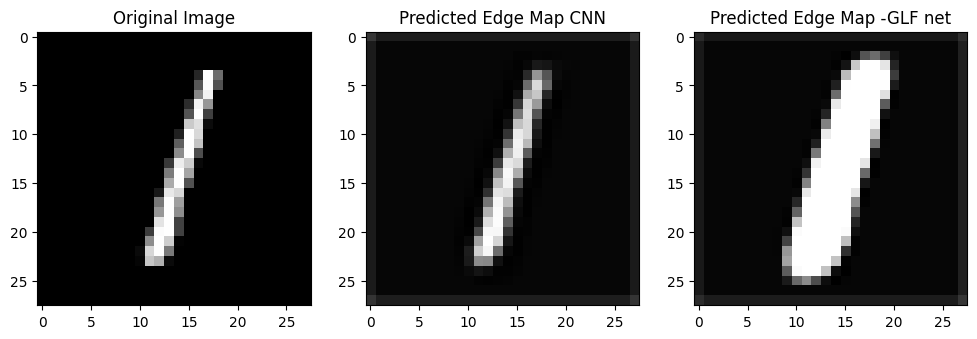

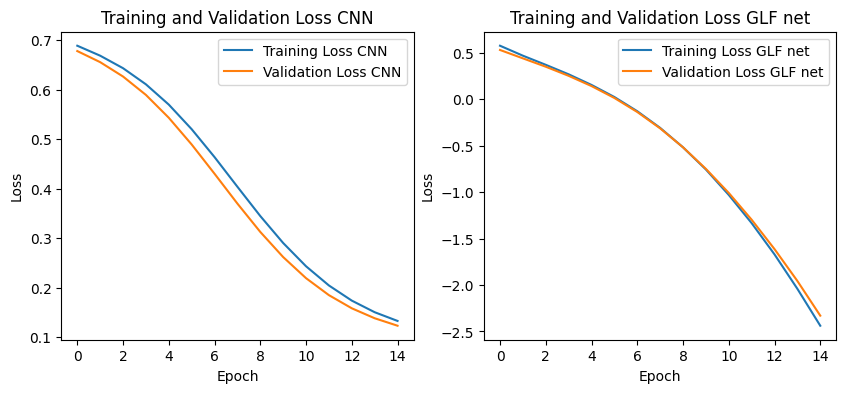

Epoch 1/15
8/8 [==============================] - 1s 174ms/step - loss: 0.1196 - val_loss: 0.1118
Epoch 2/15
8/8 [==============================] - 1s 162ms/step - loss: 0.1097 - val_loss: 0.1032
Epoch 3/15
8/8 [==============================] - 1s 132ms/step - loss: 0.1022 - val_loss: 0.0967
Epoch 4/15
8/8 [==============================] - 1s 130ms/step - loss: 0.0964 - val_loss: 0.0915
Epoch 5/15
8/8 [==============================] - 1s 128ms/step - loss: 0.0919 - val_loss: 0.0874
Epoch 6/15
8/8 [==============================] - 1s 127ms/step - loss: 0.0882 - val_loss: 0.0842
Epoch 7/15
8/8 [==============================] - 1s 128ms/step - loss: 0.0853 - val_loss: 0.0815
Epoch 8/15
8/8 [==============================] - 1s 129ms/step - loss: 0.0830 - val_loss: 0.0793
Epoch 9/15
8/8 [==============================] - 1s 128ms/step - loss: 0.0810 - val_loss: 0.0775
Epoch 10/15
8/8 [==============================] - 1s 127ms/step - loss: 0.0794 - val_loss: 0.0760
Epoch 11/15
8/8 [==

In [ ]:
# Fractional neighboring pixels vertically
train_images_diff = fractional_grunwald_letnikov(train_images, order=0.99, step_size=1)
test_images_diff = fractional_grunwald_letnikov(test_images, order=0.99, step_size=1)

#---------------------------------diaa-----------------------------------------------#

# Define the CNN architecture for image edge detection (Simple CNN)
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the simple CNN model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the simple CNN model
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
# Test the custom subtraction method model on the test dataset

# Test the custom subtraction method model on a sample image
test_image= test_images[2]
test_image= np.expand_dims(test_image, axis=0)  # Add batch dimension
predicted_edge_maps_simple = simple_model.predict(test_image)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_simple_binary = (predicted_edge_maps_simple > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#


# Define the CNN architecture for image edge detection (Fractional method)
custom_model = Sequential([
    Input(shape=(28, 28, 1)),  # Input shape is (28, 28, 1) for MNIST images
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Convolutional layer with 32 filters
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Convolutional layer with 1 filter for edge detection
])

# Compile the custom subtraction method model
custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the custom subtraction method model
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))

# Test the custom subtraction method model on a sample image
test_image_diff = test_images_diff[2]
test_image_diff = np.expand_dims(test_image_diff, axis=0)  # Add batch dimension
predicted_edge_maps_custom = custom_model.predict(test_image_diff)

# Convert the predicted edge maps to binary arrays
predicted_edge_maps_custom_binary = (predicted_edge_maps_custom > 0.5).astype(int)

#---------------------------------diaa-----------------------------------------------#

# Calculate F1 scores

# Create binary edge maps for the test images (simple thresholding)

test_images_maps = (test_image> 0.1).astype(int)
f1_simple = f1_score(test_images_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

test_images_diff_maps = (test_image_diff > 0.1).astype(int)
f1_custom = f1_score(test_images_diff_maps.reshape(-1), predicted_edge_maps_custom_binary.reshape(-1))

# Print F1 scores
print("F1 Score for CNN:", f1_simple)
print("F1 Score for GLF net:", f1_custom)

# Create a table of Loss and F1 scores
table = [
    ['Model', 'Loss', 'F1 Score'],
    ['CNN', np.round(history_simple.history['loss'][-1], 4), np.round(f1_simple, 4)],
    ['GLF net', np.round(history_custom.history['loss'][-1], 4), np.round(f1_custom, 4)]
]

# Plot results for simple CNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(test_image_diff), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(predicted_edge_maps_simple), cmap='gray')
plt.title('Predicted Edge Map CNN')

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(predicted_edge_maps_custom ), cmap='gray')
plt.title('Predicted Edge Map -GLF net')

plt.show()

# Plot training and validation loss for both models
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss CNN')
plt.plot(history_simple.history['val_loss'], label='Validation Loss CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss CNN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Training Loss GLF net')
plt.plot(history_custom.history['val_loss'], label='Validation Loss GLF net')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GLF net')
plt.legend()

plt.show()

#---------------------------------------------------------------------------#
# Measure training time for simple CNN model
start_time_simple = time.time()
history_simple = simple_model.fit(train_images[:1000], train_images[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images[:100], test_images[:100]))
end_time_simple = time.time()
training_time_simple = end_time_simple - start_time_simple


# Measure inference time for simple CNN model
start_time_inference_simple = time.time()
predicted_edge_maps_simple = simple_model.predict(test_image)
end_time_inference_simple = time.time()
inference_time_simple = end_time_inference_simple - start_time_inference_simple

#---------------------------------------------------------------------------#

# Measure training time for custom CNN (GLF net) model
start_time_custom = time.time()
history_custom = custom_model.fit(train_images_diff[:1000], train_images_diff[:1000], epochs=15, batch_size=128, verbose=1, validation_data=(test_images_diff[:100], test_images_diff[:100]))
end_time_custom = time.time()
training_time_custom = end_time_custom - start_time_custom



# Measure inference time for custom CNN (GLF net) model
start_time_inference_custom = time.time()
predicted_edge_maps_custom = custom_model.predict(test_image_diff)
end_time_inference_custom = time.time()
inference_time_custom = end_time_inference_custom - start_time_inference_custom
#-------------------------------------------------------------------------------#
# Create table
table = [
    ["Model", "Training Time (seconds)", "Inference Time (seconds)"],
    ["Simple CNN", f"{training_time_simple:.4f}", f"{inference_time_simple:.4f}"],
    ["GLF net", f"{training_time_custom:.4f}", f"{inference_time_custom:.4f}"]
]
# Print table using tabulate
print(tabulate(table, headers='firstrow'))
#-------------------------------------------------------------------------------#